# Entrenamiento de modelos

En este notebook se probarán varios modelos y se realizará el entrenamiento.

In [1]:
from dotenv import load_dotenv
import os

# Cargar automáticamente las variables del archivo .env
load_dotenv()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_RAW = os.getenv('DATA_RAW')
DATA_PREPROCESSED = os.getenv('DATA_PROCESSED')

In [2]:
df_train = pd.read_csv(os.path.join('..',DATA_PREPROCESSED, "dataframe_train.csv"), sep=";")
df_test = pd.read_csv(os.path.join('..', DATA_PREPROCESSED, "dataframe_test.csv"), sep = ";")

# Divsión en grupos

Como ya se mencionó en el notebook de analyisis.ipynb, no todos los sabores tienen la misma producción. Particularmente se destacó que en líneas generales los sabores pueden dividirse en dos grupos:
1. Los que tienen mayor producción en los meses de calor.
2. Los que tienen mayor producción los meses de frío.

Es por ello que para probar los distintos modelos voy a dividir el dataset en esos dos grupos.

In [3]:
grupoFrio = ['Sabor 4', 'Sabor 5', 'Sabor 12', 'Sabor 15', 'Sabor 12', 'Sabor 15', 'Sabor 17', 'Sabor 37',
'Sabor 49', 'Sabor 50', 'Sabor 30', 'Sabor 38',
'Sabor 31', 'Sabor 43', 'Sabor 56', 'Sabor 57' ,
'Sabor 60', 'Sabor 61', 'Sabor 63', 'Sabor 68',
'Sabor 69']

grupoCalor = [f'Sabor {i}' for i in range(1, 79) if f'Sabor {i}' not in grupoFrio]

# Preparación de los dataset

Conjunto de entrenamiento

In [4]:
X_train = df_train.iloc[:, :42]
y_train = df_train.iloc[:, 42:]

In [5]:
#Se dividen los y por grupos
y_train_frio = y_train[grupoFrio]
y_train_calor = y_train[grupoCalor]

Conjunto de Pruebas

In [6]:
X_test = df_test.iloc[:, :18]
y_test = df_test.iloc[:, 18:]

In [7]:
# Importar el pipeline guardado
import joblib
pipeline = joblib.load(os.path.join('..','src\\features', 'pipeline.pkl'))

column_names = X_train.columns

# Tranformar X_train
X_test_transformado = pipeline.transform(X_test)

X_test = pd.DataFrame(X_test_transformado, columns=column_names)

X_test

,rain_1h,temp,dew_point,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,weather_description_overcast clouds,weather_description_scattered clouds,weather_description_sky is clear,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,Estacion_Invierno,Estacion_Otoño,Estacion_Primavera,Estacion_Verano,EsFeriado
0,1.00,0.421616,0.296497,0.391611,0.539374,0.711133,-0.310234,-0.205128,1.084944,-0.501253,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.00,0.415896,0.372841,0.406421,0.359223,0.305603,-0.576149,-0.025641,-0.126538,0.701754,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.00,0.700061,0.597623,0.677800,0.523193,0.666505,-0.891307,-0.179487,0.110135,0.401003,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5.42,-0.097312,0.026328,-0.094105,0.000000,0.079554,0.004924,0.769231,1.806678,0.300752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.00,0.046069,-0.058285,0.026628,0.022654,0.207616,0.458752,-0.102564,-0.560047,-0.401003,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.00,0.358868,0.233364,0.330771,0.119741,0.402619,-0.147730,-0.589744,0.520211,-0.802005,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,2.00,0.487420,0.327862,0.460154,0.462783,0.550085,-0.056356,0.000000,0.841242,0.902256,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.00,0.130755,-0.200155,0.089732,0.022654,0.234780,0.260990,-0.666667,0.339777,0.902256,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
8,0.00,0.161708,-0.013545,0.131359,-0.135922,0.258065,-0.059092,-0.307692,-0.363210,0.401003,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.00,0.362415,0.260884,0.334613,0.059331,0.442396,-0.221596,-0.282051,-0.560047,-0.401003,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
y_test.fillna(0, inplace = True)

In [9]:
#Se dividen los y por grupos
y_test_frio = y_test[grupoFrio]
y_test_calor = y_test[grupoCalor]

# Entrenamiento

## Regresión Lineal

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo_regresion_lineal_calor de regresión lineal
modelo_regresion_lineal_calor = LinearRegression()

# Entrenar el modelo_regresion_lineal_calor con los datos de entrenamiento
modelo_regresion_lineal_calor.fit(X_train, y_train_calor)

# Predecir los valores para el conjunto de prueba
y_pred = modelo_regresion_lineal_calor.predict(X_test)

# Evaluar el modelo_regresion_lineal_calor
mse = mean_squared_error(y_test_calor, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test_calor, y_pred)  # Coeficiente de determinación

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R2):", r2)

Error cuadrático medio (MSE): 6220.857367462814
Coeficiente de determinación (R2): -0.26514120766381816


In [47]:
# Crear el modelo_regresion_lineal_frio de regresión lineal
modelo_regresion_lineal_frio = LinearRegression()

# Entrenar el modelo_regresion_lineal_frio con los datos de entrenamiento
modelo_regresion_lineal_frio.fit(X_train, y_train_frio)

# Predecir los valores para el conjunto de prueba
y_pred = modelo_regresion_lineal_frio.predict(X_test)

# Evaluar el modelo_regresion_lineal_frio
mse = mean_squared_error(y_test_frio, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test_frio, y_pred)  # Coeficiente de determinación

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R2):", r2)

Error cuadrático medio (MSE): 10470.382988295773
Coeficiente de determinación (R2): -21.790297529454765


Conclusión de regresión lineal: las predicciones son peor que simplemente impurtar la media de los valores real3es.

## Random Forest

In [48]:
from sklearn.tree import DecisionTreeRegressor
#from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo de árbol de decisión
modelo_arbol = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo con los datos de entrenamiento
modelo_arbol.fit(X_train, y_train_calor)

# Predecir los valores para el conjunto de prueba
y_pred = modelo_arbol.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test_calor, y_pred)  # Error cuadrático medio
r2 = r2_score(y_test_calor, y_pred)  # Coeficiente de determinación

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R2):", r2)

Error cuadrático medio (MSE): 8255.746563922517
Coeficiente de determinación (R2): -1.3873592522215017


## ARIMA

## XGBoost

In [49]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   - -------------------------------------- 5.5/150.0 MB 30.7 MB/s eta 0:00:05
   ---- ----------------------------------- 16.8/150.0 MB 46.0 MB/s eta 0:00:03
   ------- -------------------------------- 28.6/150.0 MB 50.4 MB/s eta 0:00:03
   --------- ------------------------------ 35.7/150.0 MB 45.3 MB/s eta 0:00:03
   ---------- ----------------------------- 40.9/150.0 MB 40.6 MB/s eta 0:00:03
   ------------ --------------------------- 45.1/150.0 MB 37.8 MB/s eta 0:00:03
   ------------- -------------------------- 49.3/150.0 MB 35.7 MB/s eta 0:00:03
   -------------- ------------------------- 54.5/150.0 MB 34.4 MB/s eta 0:00:03
   ----------------- ---------------------- 64.2/150.0 MB 35.6 MB/s eta 0:00:03
   ------------------ --------------------- 69.2/150.0 MB 34.2 MB/s eta 0:00:03
   ------------------- -------------------- 72.4/150


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\IA-41\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [51]:
# Importar XGBoost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear el modelo XGBoost para el grupo de calor
modelo_xgboost_calor = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)

# Entrenar el modelo con los datos de entrenamiento
modelo_xgboost_calor.fit(X_train, y_train_calor)

# Predecir los valores para el conjunto de prueba
y_pred_calor = modelo_xgboost_calor.predict(X_test)

# Evaluar el modelo
mse_calor = mean_squared_error(y_test_calor, y_pred_calor)
r2_calor = r2_score(y_test_calor, y_pred_calor)

print("Resultados para el grupo de calor:")
print("Error cuadrático medio (MSE):", mse_calor)
print("Coeficiente de determinación (R2):", r2_calor)



Resultados para el grupo de calor:
Error cuadrático medio (MSE): 6219.666276597324
Coeficiente de determinación (R2): -0.40705516934394836


## LSTM

In [71]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: C:\Users\IA-41\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [72]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
# Configurar para que TensorFlow utilice la GPU por defecto
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Configurar para que TensorFlow asigne memoria dinámicamente
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        # Especificar la GPU por defecto
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Manejar error
        print(e)

In [75]:
import numpy as np

def create_sequences(X, y, n_input, n_out):
    """
    Crea dos tensores 3D (secuencias de entrada y de salida) a partir de
    datos tabulares 2D, usando la técnica de sliding windows.

    Parámetros
    ----------
    X : np.ndarray, forma (n_days, n_features)
        Matriz con las features meteorológicas registradas día a día.
        - n_days: número total de días disponibles.
        - n_features: número de variables meteorológicas (e.g. temp, humedad...).

    y : np.ndarray, forma (n_days, n_targets)
        Matriz con los kg producidos por cada sabor de helado, día a día.
        - n_targets: número de sabores (en tu caso, 59).

    n_input : int
        Longitud de la ventana de entrada (cuántos días atrás usamos para predecir).
        Ejemplo: 30 → cada muestra de entrada tendrá 30 líneas (días).

    n_out : int
        Longitud de la ventana de salida (cuántos días queremos predecir).
        Ejemplo: 14 → cada muestra de salida tendrá 14 líneas (días futuros).

    Devuelve
    -------
    trainX : np.ndarray, forma (n_samples, n_input, n_features)
        Tensor 3D con todas las sub-ventanas de X que usarás como input al LSTM.

    trainY : np.ndarray, forma (n_samples, n_out, n_targets)
        Tensor 3D con todas las sub-ventanas de y que serán los targets del LSTM.
    """

    # 1) Inicializamos dos listas vacías donde iremos apilando las secuencias:
    Xs, Ys = [], []

    # 2) Calculamos cuántas muestras podemos extraer:
    #    - len(X) es el total de días.
    #    - Para poder sacar una ventana de n_input + n_out, el último índice válido
    #      es len(X) - n_input - n_out.
    n_samples = len(X) - n_input - n_out + 1

    # 3) Recorremos cada posición posible para extraer la ventana:
    for i in range(n_samples):
        # 3.1) Secuencia de entrada: días [i, i + n_input)
        #       → matriz de forma (n_input, n_features)
        seq_X = X[i : i + n_input]

        # 3.2) Secuencia de salida: días [i + n_input, i + n_input + n_out)
        #       → matriz de forma (n_out, n_targets)
        seq_y = y[i + n_input : i + n_input + n_out]

        # 3.3) Agregamos cada secuencia a la lista
        Xs.append(seq_X)
        Ys.append(seq_y)

    # 4) Convertimos las listas en arrays de NumPy:
    #    - Esto nos da tensores listos para alimentar a Keras/TensorFlow.
    #    - trainX tendrá forma (n_samples, n_input, n_features)
    #    - trainY tendrá forma (n_samples, n_out, n_targets)
    trainX = np.array(Xs)
    trainY = np.array(Ys)

    return trainX, trainY


# ── Uso del código ──

# Definimos cuántos días atrás y cuántos días adelante queremos:
n_input = 30   # ventana de entrada: 30 días
n_out   = 14   # ventana de salida: 14 días

# Supongamos que X_train.shape == (1082, 42) y y_train.shape == (1082, 59)
# (1082 días de datos, 42 variables meteorológicas, 59 sabores)
trainX, trainY = create_sequences(
    X_train.values,  # convertimos DataFrame a array
    y_train_calor.values,
    n_input,
    n_out
)

# Ahora:
# - trainX.shape == (1082 − 30 − 14 + 1, 30, 42) == (1039, 30, 42)
# - trainY.shape == (1039, 14, 59)



In [78]:
trainX.shape, trainY.shape

((1039, 30, 42), (1039, 14, 59))

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed, Dense

# -------------------------------------------------------------------
# 1) Definición de parámetros básicos a partir de los datos ya secuenciados
# -------------------------------------------------------------------
n_features = trainX.shape[2]   # 42 variables de entrada por timestep
n_targets  = trainY.shape[2]   # 59 salidas (kg por sabor) por timestep

# n_input y n_out ya los habrás definido antes:
# n_input = 30   # días de look-back
# n_out   = 14   # días a predecir

# -------------------------------------------------------------------
# 2) Construcción del modelo Seq2Seq many-to-many con Keras
# -------------------------------------------------------------------
model = Sequential([
    # — Encoder LSTM —
    # Procesa la secuencia de entrada de forma (n_input, n_features)
    # y entrega un vector de estado oculto de tamaño 128.
    LSTM(
        units=128,             # cantidad de neuronas en la capa LSTM
        activation='tanh',     # función de activación interna (la default)
        input_shape=(n_input, n_features)  
        # (timesteps, features) que el modelo esperará.
    ),

    # — RepeatVector —
    # Toma el vector de estado (batch, 128) del encoder
    # y lo repite n_out veces, produciendo (batch, n_out, 128).
    RepeatVector(n_out),

    # — Decoder LSTM —
    # Procesa la secuencia repetida y devuelve una secuencia completa
    # de la misma longitud n_out, cada elemento de tamaño 128.
    LSTM(
        units=128,
        activation='tanh',
        return_sequences=True   # NECESARIO para mantener la dimensión temporal
    ),

    # — TimeDistributed Dense —
    # A cada uno de los n_out vectores (de tamaño 128) le aplica
    # una capa Dense para proyectar a los n_targets (59 sabores).
    TimeDistributed(
        Dense(n_targets)       # salida por timestep: 59 valores (kg)
    )
])

# -------------------------------------------------------------------
# 3) Compilación del modelo
# -------------------------------------------------------------------
model.compile(
    optimizer='adam',  # optimizador adaptativo, buen punto de partida
    loss='mse'         # error cuadrático medio, adecuado para regresión
)

# -------------------------------------------------------------------
# 4) Visualización de la arquitectura
# -------------------------------------------------------------------
model.summary()


C:\Users\IA-41\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │        87,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_1 (RepeatVector)  │ (None, 14, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 14, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 14, 59)         │         7,611 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,747 (885.73 KB)

 Trainable params: 226,747 (885.73 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
from tensorflow.keras.callbacks import EarlyStopping

# -----------------------------
# 1) Configuramos el callback
# -----------------------------
early_stopping = EarlyStopping(
    monitor='val_loss',        # qué métrica vigilar (validación)
    patience=5,                # cuántas épocas sin mejora antes de parar
    verbose=1,                 # imprime un mensaje cuando pare
    restore_best_weights=True  # al parar, vuelve a los pesos de la mejor época
)

# -----------------------------
# 2) Entrenamos con EarlyStopping
# -----------------------------
history = model.fit(
    trainX,
    trainY,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],  # lo incluís en la lista de callbacks
    verbose=2
)


Epoch 1/50
30/30 - 11s - 357ms/step - loss: 1357.6815 - val_loss: 3234.3831
Epoch 2/50
30/30 - 1s - 35ms/step - loss: 1240.9425 - val_loss: 3132.1050
Epoch 3/50
30/30 - 1s - 34ms/step - loss: 1175.6725 - val_loss: 3061.6768
Epoch 4/50
30/30 - 1s - 34ms/step - loss: 1132.5981 - val_loss: 3013.3376
Epoch 5/50
30/30 - 1s - 35ms/step - loss: 1101.0527 - val_loss: 2977.5525
Epoch 6/50
30/30 - 1s - 35ms/step - loss: 1075.9966 - val_loss: 2948.1174
Epoch 7/50
30/30 - 1s - 36ms/step - loss: 1054.9294 - val_loss: 2923.7854
Epoch 8/50
30/30 - 1s - 33ms/step - loss: 1036.5317 - val_loss: 2903.2944
Epoch 9/50
30/30 - 1s - 33ms/step - loss: 1020.1305 - val_loss: 2886.2151
Epoch 10/50
30/30 - 1s - 33ms/step - loss: 1005.3245 - val_loss: 2872.2385
Epoch 11/50
30/30 - 1s - 36ms/step - loss: 991.8305 - val_loss: 2857.4373
Epoch 12/50
30/30 - 1s - 34ms/step - loss: 979.4224 - val_loss: 2846.8181
Epoch 13/50
30/30 - 1s - 42ms/step - loss: 968.0715 - val_loss: 2839.1821
Epoch 14/50
30/30 - 1s - 40ms/step 

In [85]:
last_X = X_train.values[-n_input:].reshape(1, n_input, n_features)
yhat   = model.predict(last_X)  # shape (1, 14, 59)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step


In [91]:
y_pred = yhat[0]

from sklearn.metrics import mean_squared_error, r2_score

# Supongamos:
# y_true.shape == (n_samples, n_targets)
# y_pred.shape == (n_samples, n_targets)

# 1) MSE global (promedia sobre todas las muestras y salidas)
mse = mean_squared_error(y_test_calor, y_pred)

# 2) R² global
r2 = r2_score(y_test_calor, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R² : {r2:.4f}")


MSE: 6653.8370
R² : -0.4398


Modelo LSTM mejorado

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# 1) Hiperparámetros
n_input    = 30       # look-back
n_out      = 14       # horizonte
n_features = trainX.shape[2]
n_targets  = trainY.shape[2]

# 2) Callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True,
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    min_lr=1e-5,
    verbose=1
)

# 3) Modelo mejorado
model = Sequential()

# Encoder empilado con Dropout
model.add(LSTM(128,
               activation='tanh',
               return_sequences=True,
               input_shape=(n_input, n_features)))
model.add(Dropout(0.2))

model.add(LSTM(128,
               activation='tanh',
               return_sequences=False))
model.add(Dropout(0.2))

# “Puente” al decoder
model.add(RepeatVector(n_out))

# Decoder empilado con recurrent_dropout
model.add(LSTM(128,
               activation='tanh',
               return_sequences=True,
               recurrent_dropout=0.2))
model.add(Dropout(0.2))

model.add(LSTM(64,
               activation='tanh',
               return_sequences=True))
model.add(Dropout(0.2))

# Salida
model.add(TimeDistributed(Dense(n_targets)))

# 4) Compilación: bajamos un poco el lr inicial
opt = Adam(learning_rate=1e-3)
model.compile(optimizer=opt, loss='mse', metrics=['mae'])

model.summary()

# 5) Entrenamiento
history = model.fit(
    trainX, trainY,
    epochs=100,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping, reduce_lr],
    verbose=2
)


C:\Users\IA-41\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 30, 128)        │        87,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 30, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_3 (RepeatVector)  │ (None, 14, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 14, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 14, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 14, 59)         │         3,835 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403,963 (1.54 MB)

 Trainable params: 403,963 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
30/30 - 28s - 949ms/step - accuracy: 0.3092 - loss: 1383.8676 - val_accuracy: 0.1648 - val_loss: 3309.5752 - learning_rate: 0.0010
Epoch 2/100
30/30 - 2s - 66ms/step - accuracy: 0.3020 - loss: 1315.2382 - val_accuracy: 0.1648 - val_loss: 3241.6819 - learning_rate: 0.0010
Epoch 3/100
30/30 - 2s - 61ms/step - accuracy: 0.3466 - loss: 1269.1381 - val_accuracy: 0.1648 - val_loss: 3189.4373 - learning_rate: 0.0010
Epoch 4/100
30/30 - 2s - 60ms/step - accuracy: 0.3834 - loss: 1233.4927 - val_accuracy: 0.1648 - val_loss: 3147.4392 - learning_rate: 0.0010
Epoch 5/100
30/30 - 2s - 66ms/step - accuracy: 0.4089 - loss: 1204.5184 - val_accuracy: 0.1648 - val_loss: 3112.6943 - learning_rate: 0.0010
Epoch 6/100
30/30 - 2s - 74ms/step - accuracy: 0.4269 - loss: 1180.6589 - val_accuracy: 0.1648 - val_loss: 3083.6392 - learning_rate: 0.0010
Epoch 7/100
30/30 - 2s - 74ms/step - accuracy: 0.4407 - loss: 1160.2096 - val_accuracy: 0.1648 - val_loss: 3058.2964 - learning_rate: 0.0010
Epoch 8/100

In [111]:
last_X = X_train.values[-n_input:].reshape(1, n_input, n_features)
yhat   = model.predict(last_X)  # shape (1, 14, 59)

y_pred = yhat[0]

from sklearn.metrics import mean_squared_error, r2_score

# Supongamos:
# y_true.shape == (n_samples, n_targets)
# y_pred.shape == (n_samples, n_targets)

# 1) MSE global (promedia sobre todas las muestras y salidas)
mse = mean_squared_error(y_test_calor, y_pred)

# 2) R² global
r2 = r2_score(y_test_calor, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R² : {r2:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 861ms/step
MSE: 6657.1178
R² : -0.4390


# XGBoost sklearn

Resultados para el conjunto de entrenamiento:
MSE (train): 67.3275
R² (train): 0.4512

Resultados para el conjunto de prueba:
MSE (test): 492.8057
R² (test): -0.7179


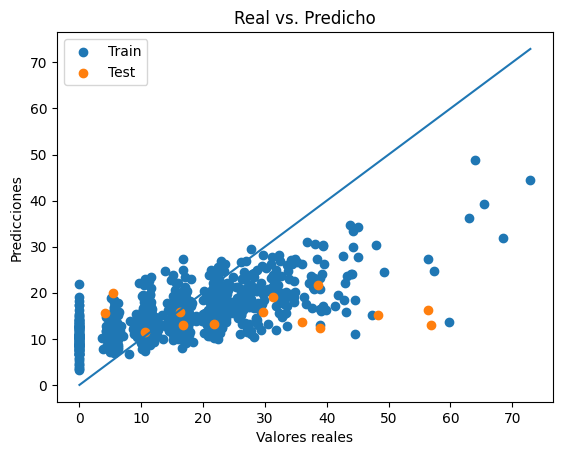

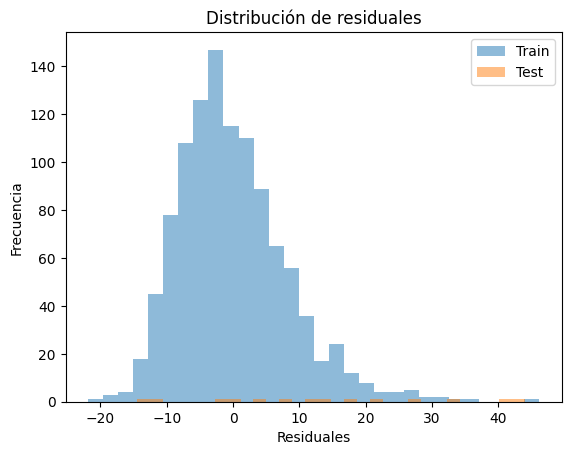

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Entrenamiento del modelo
reg = GradientBoostingRegressor(random_state=0, max_depth = )
reg.fit(X_train, y_train_calor.iloc[:, 0])

# 2. Predicciones
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

# 3. Cálculo de métricas
mse_train = mean_squared_error(y_train_calor.iloc[:, 0], y_pred_train)
r2_train = r2_score(y_train_calor.iloc[:, 0], y_pred_train)
mse_test = mean_squared_error(y_test_calor.iloc[:, 0], y_pred_test)
r2_test = r2_score(y_test_calor.iloc[:, 0], y_pred_test)

print("Resultados para el conjunto de entrenamiento:")
print(f"MSE (train): {mse_train:.4f}")
print(f"R² (train): {r2_train:.4f}\n")

print("Resultados para el conjunto de prueba:")
print(f"MSE (test): {mse_test:.4f}")
print(f"R² (test): {r2_test:.4f}")

# 4. Gráfico Real vs. Predicho
plt.figure()
plt.scatter(y_train_calor.iloc[:, 0], y_pred_train, label='Train')
plt.scatter(y_test_calor.iloc[:, 0], y_pred_test, label='Test')
min_val = min(y_train_calor.iloc[:, 0].min(), y_test_calor.iloc[:, 0].min())
max_val = max(y_train_calor.iloc[:, 0].max(), y_test_calor.iloc[:, 0].max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.legend()
plt.title('Real vs. Predicho')
plt.show()

# 5. Distribución de residuales
residuals_train = y_train_calor.iloc[:, 0] - y_pred_train
residuals_test = y_test_calor.iloc[:, 0] - y_pred_test

plt.figure()
plt.hist(residuals_train, bins=30, alpha=0.5, label='Train')
plt.hist(residuals_test, bins=30, alpha=0.5, label='Test')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Distribución de residuales')
plt.show()


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
      Iter       Train Loss      OOB Improve   Remaining Time 
         1         127.7976           0.2290            2.92s
         2         120.8227          -9.3965            2.04s
         3         110.7921         -14.2564            1.67s
         4         116.9949          10.2698            1.47s
         5         119.0112           3.9605            1.34s
         6         124.6567           9.5551            1.38s
         7         122.4689          -2.3747            1.34s
         8         118.7065          -4.7751            1.30s
         9         119.3150           1.8315            1.31s
        10         114.5070          -6.3407            1.34s
        20         111.7454          -1.6661            1.28s
        30         119.6677           1.3603            1.06s
        40         105.9481          -5.0180            1.04s
        50         107.2963          -8.8934            0.99s
     

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

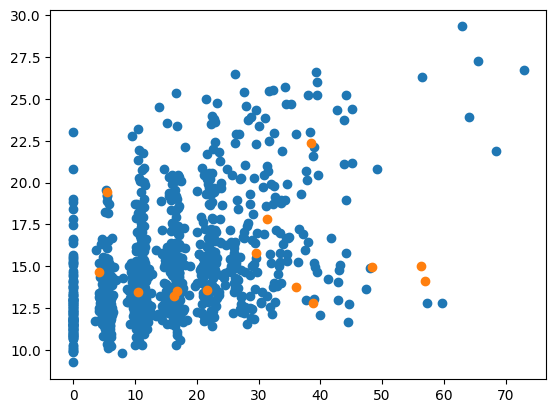

In [32]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

# 1. Define tu modelo base
reg = GradientBoostingRegressor(random_state=0, verbose=1)

# 2. Define la rejilla de parámetros que quieras tunear
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0]
}

# 3. Configura un TimeSeriesSplit para no mezclar orden temporal
tscv = TimeSeriesSplit(n_splits=5)

# 4. Arma el GridSearch
grid_search = GridSearchCV(
    estimator=reg,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# 5. Ejecuta el ajuste solo sobre X_train, y_train
grid_search.fit(X_train, y_train_calor.iloc[:, 0])

print("Mejores parámetros:", grid_search.best_params_)
print("Mejor CV MSE (negativo):", grid_search.best_score_)

# 6. Usa el mejor modelo para predecir en train y test
best_reg = grid_search.best_estimator_

y_pred_train = best_reg.predict(X_train)
y_pred_test  = best_reg.predict(X_test)

# 7. Calcula métricas finales
mse_train = mean_squared_error(y_train_calor.iloc[:, 0], y_pred_train)
r2_train  = r2_score(             y_train_calor.iloc[:, 0], y_pred_train)
mse_test  = mean_squared_error(y_test_calor.iloc[:, 0],  y_pred_test)
r2_test   = r2_score(             y_test_calor.iloc[:, 0],  y_pred_test)

print("\nResultados con el mejor modelo:")
print(f"Train → MSE: {mse_train:.4f} | R²: {r2_train:.4f}")
print(f" Test → MSE: {mse_test:.4f} | R²: {r2_test:.4f}")

# 8. Gráficos (igual que antes, opcional)
plt.figure()
plt.scatter(y_train_calor.iloc[:,0], y_pred_train, label='Train')
plt.scatter(y_test_calor.iloc[:,0],  y_pred_test,  label='Test')
_min = min(y_train_calor.min(), y_test_calor.min())
_max = max(y_train_calor.max(), y_test_calor.max())
plt.plot([_min,_max],[ _min,_max], '--', color='gray')
plt.xlabel('Real'); plt.ylabel('Predicho')
plt.legend(); plt.title('Real vs Predicho con modelo optimizado')
plt.show()


      Iter       Train Loss   Remaining Time 
         1         114.3476            1.89s
         2         107.5076            1.65s
         3         101.7731            1.41s
         4          95.6969            1.47s
         5          90.7715            1.44s
         6          86.0395            1.31s
         7          82.1412            1.41s
         8          77.7502            1.35s
         9          74.8965            1.37s
        10          71.4860            1.31s
        20          48.4114            1.55s
        30          34.8642            1.29s
        40          28.1969            1.18s
        50          22.0594            1.06s
        60          18.0474            0.87s
        70          14.5581            0.67s
        80          11.8872            0.43s
        90           9.8489            0.22s
       100           8.0334            0.00s
Resultados para el conjunto de entrenamiento:
MSE (train): 8.0334
R² (train): 0.9345

Resultados pa

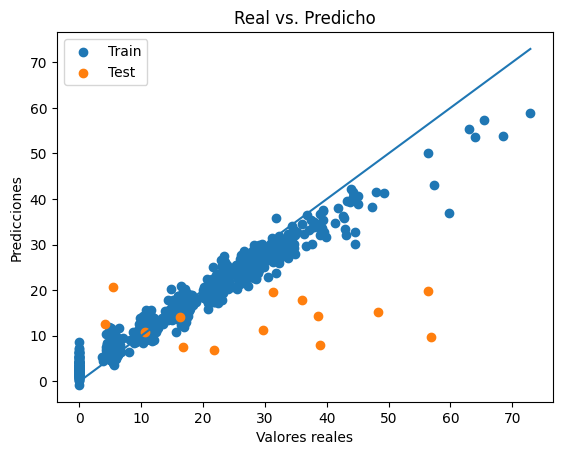

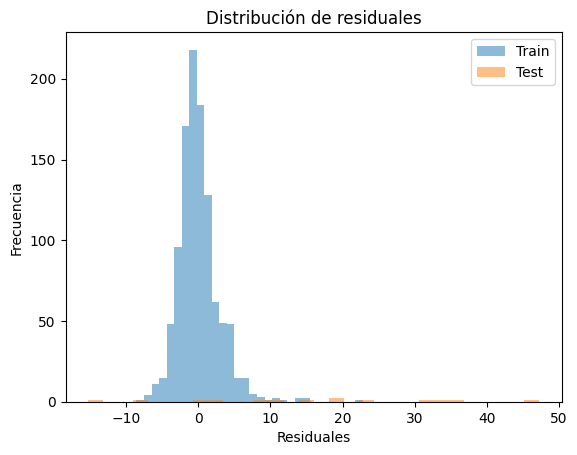

In [31]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Entrenamiento del modelo
reg = GradientBoostingRegressor(random_state=0, learning_rate = 0.1, n_estimators=100, subsample=1.0, min_samples_leaf=10, max_depth = 10, verbose = 1)
reg.fit(X_train, y_train_calor.iloc[:, 0])

# 2. Predicciones
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

# 3. Cálculo de métricas
mse_train = mean_squared_error(y_train_calor.iloc[:, 0], y_pred_train)
r2_train = r2_score(y_train_calor.iloc[:, 0], y_pred_train)
mse_test = mean_squared_error(y_test_calor.iloc[:, 0], y_pred_test)
r2_test = r2_score(y_test_calor.iloc[:, 0], y_pred_test)

print("Resultados para el conjunto de entrenamiento:")
print(f"MSE (train): {mse_train:.4f}")
print(f"R² (train): {r2_train:.4f}\n")

print("Resultados para el conjunto de prueba:")
print(f"MSE (test): {mse_test:.4f}")
print(f"R² (test): {r2_test:.4f}")

# 4. Gráfico Real vs. Predicho
plt.figure()
plt.scatter(y_train_calor.iloc[:, 0], y_pred_train, label='Train')
plt.scatter(y_test_calor.iloc[:, 0], y_pred_test, label='Test')
min_val = min(y_train_calor.iloc[:, 0].min(), y_test_calor.iloc[:, 0].min())
max_val = max(y_train_calor.iloc[:, 0].max(), y_test_calor.iloc[:, 0].max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.legend()
plt.title('Real vs. Predicho')
plt.show()

# 5. Distribución de residuales
residuals_train = y_train_calor.iloc[:, 0] - y_pred_train
residuals_test = y_test_calor.iloc[:, 0] - y_pred_test

plt.figure()
plt.hist(residuals_train, bins=30, alpha=0.5, label='Train')
plt.hist(residuals_test, bins=30, alpha=0.5, label='Test')
plt.xlabel('Residuales')
plt.ylabel('Frecuencia')
plt.legend()
plt.title('Distribución de residuales')
plt.show()
